# Classifying Handwritten Characters using Convolutional Neural Network (CNN)

Accuracy level: 94.34%

By: Fahim Ahmad YOUSUFZAI

Date submitted: 16.11.2023


## Required Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import keras
from extra_keras_datasets import emnist # pip install extra-keras-datasets

## My Custom Functions

In [5]:
# function to plot the accuracy and loss of a single model
def plot_model(m):
  accuracy = m.history['accuracy']
  validation_accuracy = m.history['val_accuracy']
  x_line = [n for n in range(1, len(accuracy)+1)]

  loss = m.history['loss']
  validation_loss = m.history['val_loss']

  plt.subplot(2,1,1)
  plt.plot(x_line, accuracy, label = "training")
  plt.plot(x_line, validation_accuracy, label = "validation")
  max_y = max([max(accuracy), max(validation_accuracy)])
  if max_y < 1:
    max_y = 1

  plt.ylim(0, max_y)
  plt.ylabel("Accuracy")
  plt.legend()

  plt.subplot(2,1,2)
  plt.plot(x_line, loss, label = "training")
  plt.plot(x_line, validation_loss, label = "validation")
  max_y = max([max(loss), max(validation_loss)])
  if max_y < 1:
    max_y = 1

  plt.ylim(0, max_y)

  plt.ylabel("Loss")
  plt.legend()

# function to plot the accuracy and loss of multiple models
def plot_models(model_dict, rows, cols):
  fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
  n1 = 0
  n2 = 0

  for k, v in model_dict.items():
    title = k
    acc = v.history['accuracy']
    val_acc = v.history['val_accuracy']
    loss = v.history['loss']
    val_loss = v.history['val_loss']
    x_line = [n for n in range(1, len(acc)+1)]

    axes[n1, n2].plot(x_line, acc, color="green", linestyle="-")
    axes[n1, n2].plot(x_line, val_acc, color="green", linestyle="--")
    axes[n1, n2].plot(x_line, loss, color="red", linestyle="-")
    axes[n1, n2].plot(x_line, val_loss, color="red", linestyle="--")
    axes[n1, n2].set_ylabel(title)

    # print(f"{n1=},, {n2=}")
    n2 += 1

    if n2 > (cols-1):
      n2 = 0
      n1 += 1

  fig.subplots_adjust(bottom=0.2)
  fig.legend(["training: accuracy", "validation: accuracy", "training: loss", "validation: loss"],
           loc='upper center', ncol=2)

  plt.show()

# function to plot the accuracy and loss of the model with the test data
def plot_models_eval(model_eval_dict):
  x = list()
  acc = list()
  loss = list()

  for k, v in model_eval_dict.items():
    x.append(k)
    loss.append(v[0])
    acc.append(v[1])

  plt.subplot(311)
  plt.bar(x, acc)
  plt.ylabel("Accuracy")

  plt.subplot(312)
  plt.bar(x, loss)
  plt.ylabel("Loss")

## About the Data:

I used thhe EMNIST dataset for this project. It is a set of handwritten letters derived from the NIST Special Database 19 and converted to a 28x28 pixel image format. Further information on the dataset contents and conversion process can be found in the following paper: https://arxiv.org/abs/1702.05373v1

In [6]:
# loading data
(X_train_images, Y_train_labels), (X_test_images, Y_test_labels) = emnist.load_data(type='letters')

743900280/743900280 [==============================] - 11s 0us/step


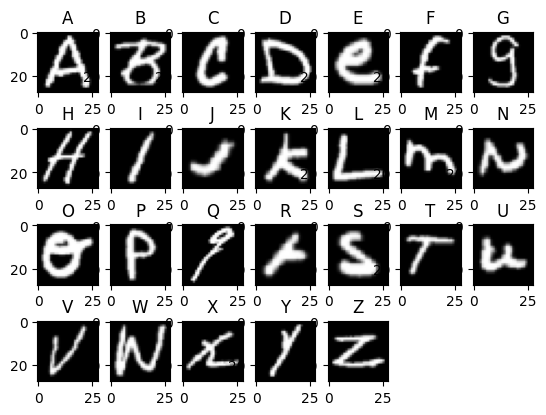

In [7]:
for n in range(1, 27):
    image = X_train_images[Y_train_labels == n][1]
    plt.subplot(4, 7, n)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(chr(ord('A') + n - 1))

plt.show()

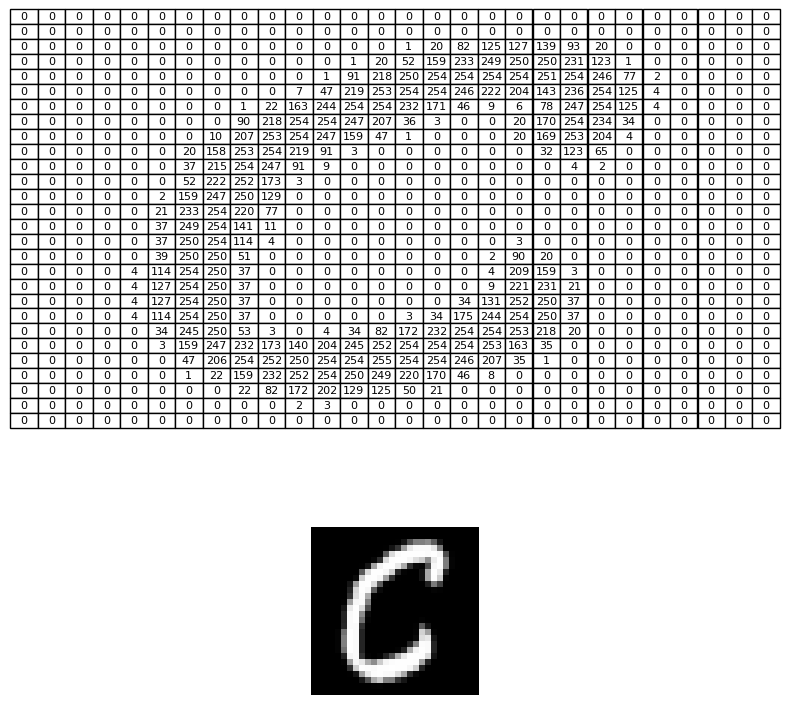

In [8]:
image_data = X_train_images[42]

fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].axis('off')
table = axs[0].table(cellText=np.round(image_data, 2),
                     cellLoc='center',
                     loc='center',
                     edges='closed')

table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)

axs[1].axis('off')
axs[1].imshow(image_data, cmap=plt.get_cmap('gray'))

plt.tight_layout()
plt.show()

## Data Manipulation

I performed the following steps as part of the data pre-processing:

- Normalization: to standardize pixel values to a range between 0 and 1 for consistent scaling.
- Reshaping: to restructure image arrays.
- One-Hot Encoding: to convert labels into a binary matrix representation

In [9]:
# normalize
X_train_images = X_train_images.astype('float32')/255
X_test_images = X_test_images.astype('float32')/255

In [10]:
# reshape
height = len(X_train_images[0])
width = len(X_train_images[0][0])

X_train_images = X_train_images.reshape(-1, height, width, 1)
X_test_images = X_test_images.reshape(-1, height, width, 1)

In [11]:
# One-hot encode labels
Y_train_labels = keras.utils.to_categorical(Y_train_labels)
Y_test_labels = keras.utils.to_categorical(Y_test_labels)

## Model Development and Training

I developed 18 different models and changed the model architecture by:

- adding and removing convoltional layers
- changing the dense layers to add more complixity
- changing activation and loss functions
- using regularization (different dropout rates and early stopping)
- using different optimization algorithms
- using different learning rate

### Model 1

- Convolutional Layers:
    - Number of Conv2D layers: 1
    - Filters/kernels: 32
    - Kernel size: (3, 3)
    - Activation function: ReLU

- Pooling Layers:
    - Number of MaxPooling2D layers: 1
    - Pool size: (2, 2)

- Flattening Layer:
    - 1 layer used to flatten the output of the previous layers.

- Dense Layers:
    - Number of hidden Dense layers: 2
    - First Dense layer:
      - Neurons: 512
      - Activation function: ReLU
    - Second Dense layer:
      - Neurons: 27
      - Activation function: Softmax

- Model Compilation:
  - Optimizer: Adam
  - Loss function: Categorical Crossentropy

In [12]:
# model 1
model1 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(27,activation='softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 512)               2769408   
                                                                 
 dense_1 (Dense)             (None, 27)                13851     
                                                                 
Total params: 2783579 (10.62 MB)
Trainable params: 2783579 (10.62 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [13]:
model1.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=(["accuracy"]))

model1_history = model1.fit(X_train_images, Y_train_labels,
                    epochs=20,
                    batch_size=100,
                    validation_split = 0.2,
                    verbose=1)

Epoch 1/20
999/999 [==============================] - 16s 6ms/step - loss: 0.5390 - accuracy: 0.8341 - val_loss: 0.3187 - val_accuracy: 0.9002
Epoch 2/20
999/999 [==============================] - 5s 5ms/step - loss: 0.2491 - accuracy: 0.9173 - val_loss: 0.2469 - val_accuracy: 0.9207
Epoch 3/20
999/999 [==============================] - 6s 6ms/step - loss: 0.1904 - accuracy: 0.9349 - val_loss: 0.2444 - val_accuracy: 0.9214
Epoch 4/20
999/999 [==============================] - 5s 5ms/step - loss: 0.1534 - accuracy: 0.9463 - val_loss: 0.2371 - val_accuracy: 0.9237
Epoch 5/20
999/999 [==============================] - 5s 5ms/step - loss: 0.1266 - accuracy: 0.9538 - val_loss: 0.2433 - val_accuracy: 0.9229
Epoch 6/20
999/999 [==============================] - 6s 6ms/step - loss: 0.1064 - accuracy: 0.9599 - val_loss: 0.2555 - val_accuracy: 0.9230
Epoch 7/20
999/999 [==============================] - 5s 5ms/step - loss: 0.0913 - accuracy: 0.9643 - val_loss: 0.2618 - val_accuracy: 0.9249
Epoch

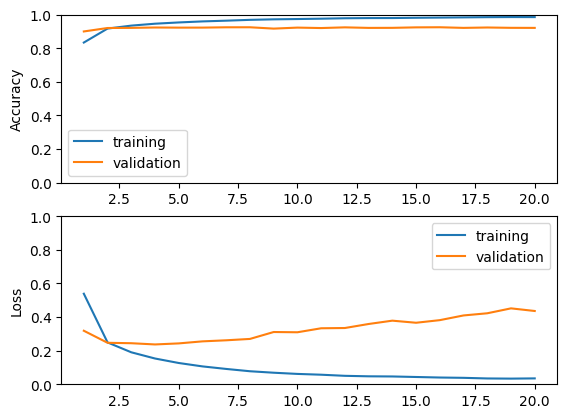

In [27]:
plot_model(model1_history)

In [28]:
model1_eval = model1.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model1_eval[1]}")

650/650 [==============================] - 2s 4ms/step - loss: 0.4524 - accuracy: 0.9208
Accuracy with test data: 0.920769214630127


### Model 2

*Changes from previous model*: added more convolutional, maxpooling, and dense layers.





- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam
  - Loss function: Categorical Crossentropy

In [29]:
# model 2
model2 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(27,activation='softmax')
])

model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 2, 2, 512)        

In [31]:
model2.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=(["accuracy"]))

model2_history = model2.fit(X_train_images, Y_train_labels,
                    epochs = 20,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/20
999/999 [==============================] - 10s 8ms/step - loss: 0.4906 - accuracy: 0.8432 - val_loss: 0.2468 - val_accuracy: 0.9185
Epoch 2/20
999/999 [==============================] - 8s 8ms/step - loss: 0.2107 - accuracy: 0.9281 - val_loss: 0.2051 - val_accuracy: 0.9296
Epoch 3/20
999/999 [==============================] - 7s 7ms/step - loss: 0.1714 - accuracy: 0.9398 - val_loss: 0.1971 - val_accuracy: 0.9332
Epoch 4/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1462 - accuracy: 0.9474 - val_loss: 0.1847 - val_accuracy: 0.9365
Epoch 5/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1287 - accuracy: 0.9525 - val_loss: 0.1796 - val_accuracy: 0.9416
Epoch 6/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1127 - accuracy: 0.9574 - val_loss: 0.1887 - val_accuracy: 0.9399
Epoch 7/20
999/999 [==============================] - 7s 7ms/step - loss: 0.1004 - accuracy: 0.9608 - val_loss: 0.1992 - val_accuracy: 0.9387
Epoch

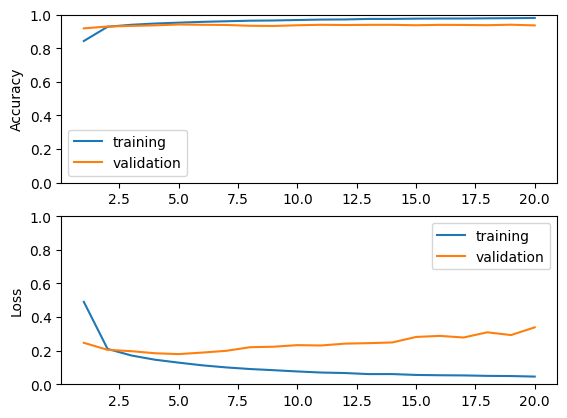

In [32]:
plot_model(model2_history)

In [33]:
model2_eval = model2.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model2_eval[1]}")

650/650 [==============================] - 2s 3ms/step - loss: 0.3492 - accuracy: 0.9339
Accuracy with test data: 0.9338942170143127


### Model 3

*Changes from previous model*: regularization - added 10% dropout

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam
  - Loss function: Categorical Crossentropy

- **Regularization**:
  - Dropout rate: 0.1 for all dropout layers

In [17]:
model3 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(27,activation='softmax')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 2, 2, 512)        

In [18]:
model3.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=(["accuracy"]))

model3_history = model3.fit(X_train_images, Y_train_labels,
                    epochs = 20,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/20
999/999 [==============================] - 13s 9ms/step - loss: 0.5586 - accuracy: 0.8246 - val_loss: 0.2538 - val_accuracy: 0.9189
Epoch 2/20
999/999 [==============================] - 8s 8ms/step - loss: 0.2313 - accuracy: 0.9215 - val_loss: 0.2264 - val_accuracy: 0.9251
Epoch 3/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1866 - accuracy: 0.9356 - val_loss: 0.1829 - val_accuracy: 0.9388
Epoch 4/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1626 - accuracy: 0.9421 - val_loss: 0.2057 - val_accuracy: 0.9347
Epoch 5/20
999/999 [==============================] - 7s 7ms/step - loss: 0.1433 - accuracy: 0.9484 - val_loss: 0.1779 - val_accuracy: 0.9417
Epoch 6/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1293 - accuracy: 0.9527 - val_loss: 0.1842 - val_accuracy: 0.9420
Epoch 7/20
999/999 [==============================] - 7s 7ms/step - loss: 0.1145 - accuracy: 0.9567 - val_loss: 0.1918 - val_accuracy: 0.9374
Epoch

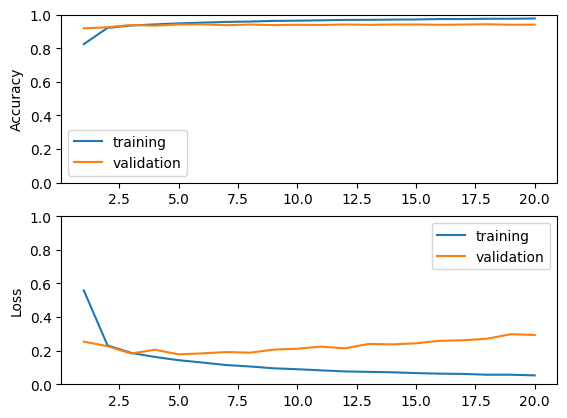

In [19]:
# start from here
plot_model(model3_history)

In [34]:
model3_eval = model3.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model3_eval[1]}")

650/650 [==============================] - 3s 4ms/step - loss: 0.2965 - accuracy: 0.9399
Accuracy with test data: 0.9399038553237915


### Model 4

*Changes from previous model*: regularization - used early stopping method

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam
  - Loss function: Categorical Crossentropy

- **Regularization Techniques**:
  - Dropout: Used 10% dropout

  - Early Stopping:
    - Monitor: 'val_accuracy'
    - Minimum change: 0.001
    - Patience: 3 epochs
    - Mode: 'max' (for maximizing validation accuracy)


In [36]:
model4 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(27,activation='softmax')
])

model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 2, 2, 512)        

In [37]:
model4.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=(["accuracy"]))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                       min_delta=0.001,
                                       verbose=0,
                                       restore_best_weights = True,
                                       patience=3,
                                       mode='max')

model4_history = model4.fit(X_train_images, Y_train_labels,
                    epochs = 20,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose=1,
                    callbacks=[early_stopping])

early_stop_n = early_stopping.stopped_epoch

if  early_stop_n > 0:
    print(f"training the model is stopped early at epoch {early_stop_n + 1}")
else:
    print("training completed without early stopping.")

Epoch 1/20
999/999 [==============================] - 10s 9ms/step - loss: 0.5362 - accuracy: 0.8294 - val_loss: 0.2457 - val_accuracy: 0.9200
Epoch 2/20
999/999 [==============================] - 8s 8ms/step - loss: 0.2283 - accuracy: 0.9234 - val_loss: 0.2195 - val_accuracy: 0.9256
Epoch 3/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1858 - accuracy: 0.9361 - val_loss: 0.1912 - val_accuracy: 0.9358
Epoch 4/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1584 - accuracy: 0.9436 - val_loss: 0.1898 - val_accuracy: 0.9373
Epoch 5/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1404 - accuracy: 0.9498 - val_loss: 0.1922 - val_accuracy: 0.9370
Epoch 6/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1256 - accuracy: 0.9534 - val_loss: 0.1855 - val_accuracy: 0.9401
Epoch 7/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1121 - accuracy: 0.9573 - val_loss: 0.1901 - val_accuracy: 0.9428
Epoch

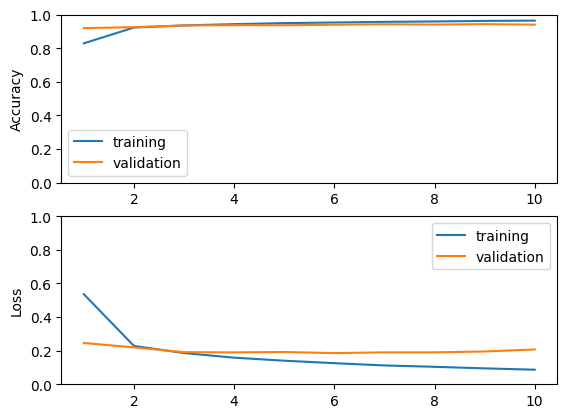

In [38]:
plot_model(model4_history)

In [39]:
model4_eval = model4.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model4_eval[1]}")

650/650 [==============================] - 2s 3ms/step - loss: 0.1927 - accuracy: 0.9412
Accuracy with test data: 0.9411538243293762


### Model 5

*Changes from previous model*: used data augmentation

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam
  - Loss function: Categorical Crossentropy

- **Data Augmentation**:
  - ImageDataGenerator used for data augmentation:
    - Validation split: 20%
    - Width shift range: 0.1
    - Height shift range: 0.1
    - Rotation range: 15 degrees
    - Zoom range: 0.1

- **Regularization Techniques**:
  - Dropout: 0.1 for all dropout layers
  - Early Stopping:
    - Monitor: 'val_accuracy'
    - Minimum change: 0.001
    - Patience: 3 epochs
    - Mode: 'max' (for maximizing validation accuracy)

In [24]:
# model 5
model5 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(27,activation='softmax')
])

model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 2, 2, 512)        

In [25]:
model5.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=(["accuracy"]))

# early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
#                                        min_delta=0.001,
#                                        verbose=0,
#                                        restore_best_weights = True,
#                                        patience=3,
#                                        mode='max')

data_augmentation_generator = keras.preprocessing.image.ImageDataGenerator(validation_split=.2,
                                            width_shift_range=.1,
                                            height_shift_range=.1,
                                            rotation_range=15,
                                            zoom_range=.1)

training_generator = data_augmentation_generator.flow(X_train_images, Y_train_labels, subset='training')
validation_generator = data_augmentation_generator.flow(X_train_images, Y_train_labels, subset='validation')

model5_history = model5.fit(training_generator,
                            epochs=20,
                            batch_size = 100,
                            validation_data=validation_generator,
                            verbose = 1,
                            callbacks=[early_stopping])

early_stop_n = early_stopping.stopped_epoch

if  early_stop_n > 0:
    print(f"training the model is stopped early at epoch {early_stop_n + 1}")
else:
    print("training completed without early stopping.")

Epoch 1/20
3120/3120 [==============================] - 63s 19ms/step - loss: 0.6258 - accuracy: 0.8019 - val_loss: 0.3316 - val_accuracy: 0.8909
Epoch 2/20
3120/3120 [==============================] - 55s 18ms/step - loss: 0.3092 - accuracy: 0.8984 - val_loss: 0.2759 - val_accuracy: 0.9071
Epoch 3/20
3120/3120 [==============================] - 56s 18ms/step - loss: 0.2697 - accuracy: 0.9106 - val_loss: 0.2324 - val_accuracy: 0.9212
Epoch 4/20
3120/3120 [==============================] - 55s 18ms/step - loss: 0.2450 - accuracy: 0.9187 - val_loss: 0.2418 - val_accuracy: 0.9205
Epoch 5/20
3120/3120 [==============================] - 55s 18ms/step - loss: 0.2337 - accuracy: 0.9218 - val_loss: 0.2247 - val_accuracy: 0.9235
Epoch 6/20
3120/3120 [==============================] - 55s 18ms/step - loss: 0.2199 - accuracy: 0.9257 - val_loss: 0.2151 - val_accuracy: 0.9284
Epoch 7/20
3120/3120 [==============================] - 55s 18ms/step - loss: 0.2137 - accuracy: 0.9273 - val_loss: 0.2110 -

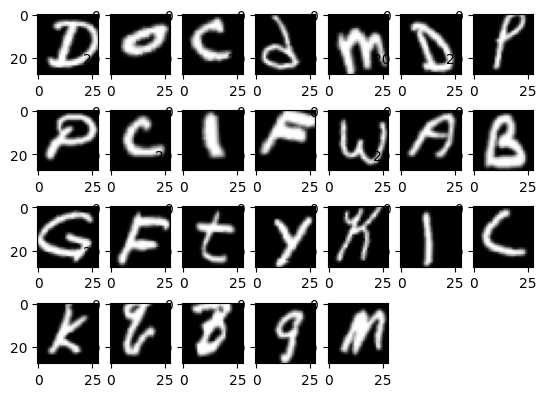

In [38]:
# here is how my data looks after the augmentation
for n in range(1, 27):
  plt.subplot(4, 7, n)
  x_batch, y_batch = next(training_generator)
  plt.imshow(x_batch[0].squeeze(), cmap='gray')

plt.show()

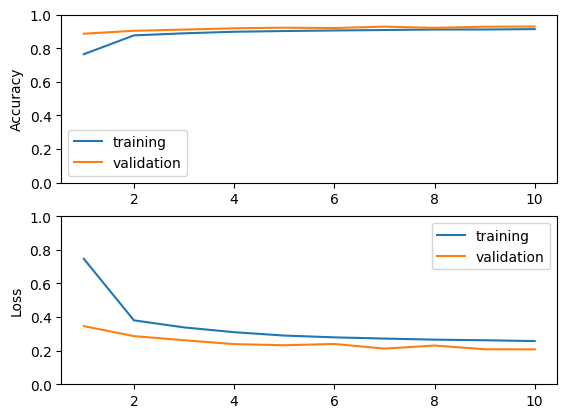

In [39]:
plot_model(model5_history)

In [40]:
model5_eval = model5.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model5_eval[1]}")

650/650 [==============================] - 2s 3ms/step - loss: 0.1903 - accuracy: 0.9387
Accuracy with test data: 0.938653826713562


### Model 6

*Changes from previous model*: changed activition function from "relu" to "elu"

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ELU
  - Filters: 64, Kernel size: (3, 3), Activation: ELU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ELU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ELU
  - Neurons: 128, Activation: ELU
  - Neurons: 100, Activation: ELU
  - Neurons: 50, Activation: ELU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam
  - Loss function: Categorical Crossentropy

**Regularization Techniques**:
  - Dropout: 0.1 for all dropout layers
  - Early Stopping:
    - Monitor: 'val_accuracy'
    - Minimum change: 0.001
    - Patience: 3 epochs
    - Mode: 'max' (for maximizing validation accuracy)


In [41]:
# model 6
model6 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="elu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),


    keras.layers.Conv2D(64, (3,3), activation="elu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="elu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='elu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128,activation='elu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(100,activation='elu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(50,activation='elu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(27,activation='softmax')
])

model6.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 2, 2, 512)        

In [42]:
model6.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=(["accuracy"]))

# early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
#                                        min_delta=0.001,
#                                        verbose=0,
#                                        restore_best_weights = True,
#                                        patience=3,
#                                        mode='max')

model6_history = model6.fit(X_train_images, Y_train_labels,
                    epochs = 20,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose=1,
                    callbacks=[early_stopping])

early_stop_n = early_stopping.stopped_epoch

if  early_stop_n > 0:
    print(f"training the model is stopped early at epoch {early_stop_n + 1}")
else:
    print("training completed without early stopping.")

Epoch 1/20
999/999 [==============================] - 12s 10ms/step - loss: 0.5467 - accuracy: 0.8269 - val_loss: 0.2704 - val_accuracy: 0.9093
Epoch 2/20
999/999 [==============================] - 9s 9ms/step - loss: 0.2755 - accuracy: 0.9105 - val_loss: 0.2326 - val_accuracy: 0.9245
Epoch 3/20
999/999 [==============================] - 9s 9ms/step - loss: 0.2256 - accuracy: 0.9246 - val_loss: 0.2273 - val_accuracy: 0.9234
Epoch 4/20
999/999 [==============================] - 9s 9ms/step - loss: 0.2027 - accuracy: 0.9317 - val_loss: 0.2082 - val_accuracy: 0.9340
Epoch 5/20
999/999 [==============================] - 9s 9ms/step - loss: 0.1828 - accuracy: 0.9387 - val_loss: 0.2042 - val_accuracy: 0.9359
Epoch 6/20
999/999 [==============================] - 9s 9ms/step - loss: 0.1661 - accuracy: 0.9430 - val_loss: 0.2013 - val_accuracy: 0.9371
Epoch 7/20
999/999 [==============================] - 9s 9ms/step - loss: 0.1541 - accuracy: 0.9463 - val_loss: 0.1950 - val_accuracy: 0.9392
Epoc

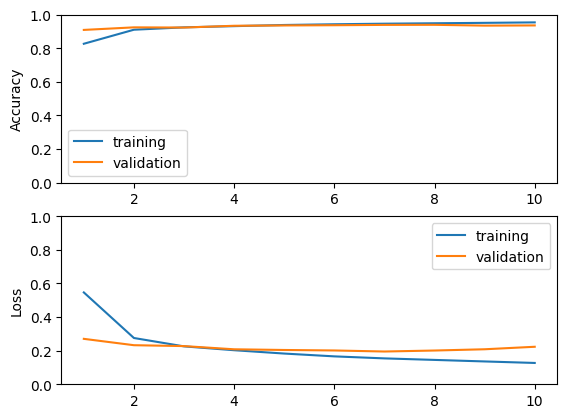

In [43]:
plot_model(model6_history)

In [44]:
model6_eval = model6.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model6_eval[1]}")

650/650 [==============================] - 3s 4ms/step - loss: 0.1990 - accuracy: 0.9393
Accuracy with test data: 0.9392788410186768


### Model 7

*Changes from previous model*: changed "Adam" optimizer to "sgd" and used back "relu"

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 100, Activation: ReLU
  - Neurons: 50, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: SGD
  - Loss function: Categorical Crossentropy

- **Regularization**:
  - Dropout rate: 0.1 for all Dropout layers
  - Early Stopping:
    - Monitor: 'val_accuracy'
    - Minimum change: 0.001
    - Patience: 3 epochs
    - Mode: 'max' (for maximizing validation accuracy)


In [46]:
# model 7
model7 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(27,activation='softmax')
])

model7.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 3, 3, 512)         295424    
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 1, 1, 512)       

In [47]:
model7.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=(["accuracy"]))

# early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
#                                        min_delta=0.001,
#                                        verbose=0,
#                                        restore_best_weights = True,
#                                        patience=3,
#                                        mode='max')

model7_history = model7.fit(X_train_images, Y_train_labels,
                            epochs=20,
                            batch_size = 100,
                            validation_split = 0.2,
                            verbose = 1,
                            callbacks=[early_stopping])

early_stop_n = early_stopping.stopped_epoch

if  early_stop_n > 0:
    print(f"training the model is stopped early at epoch {early_stop_n + 1}")
else:
    print("training completed without early stopping.")

Epoch 1/20
999/999 [==============================] - 10s 8ms/step - loss: 3.2474 - accuracy: 0.0734 - val_loss: 3.0615 - val_accuracy: 0.1701
Epoch 2/20
999/999 [==============================] - 7s 7ms/step - loss: 2.3972 - accuracy: 0.2805 - val_loss: 1.6143 - val_accuracy: 0.5126
Epoch 3/20
999/999 [==============================] - 7s 8ms/step - loss: 1.4533 - accuracy: 0.5425 - val_loss: 1.0864 - val_accuracy: 0.6585
Epoch 4/20
999/999 [==============================] - 7s 7ms/step - loss: 1.0450 - accuracy: 0.6659 - val_loss: 0.7628 - val_accuracy: 0.7565
Epoch 5/20
999/999 [==============================] - 8s 8ms/step - loss: 0.8475 - accuracy: 0.7252 - val_loss: 0.6462 - val_accuracy: 0.7882
Epoch 6/20
999/999 [==============================] - 7s 7ms/step - loss: 0.7324 - accuracy: 0.7600 - val_loss: 0.5842 - val_accuracy: 0.8069
Epoch 7/20
999/999 [==============================] - 7s 7ms/step - loss: 0.6590 - accuracy: 0.7835 - val_loss: 0.5536 - val_accuracy: 0.8154
Epoch

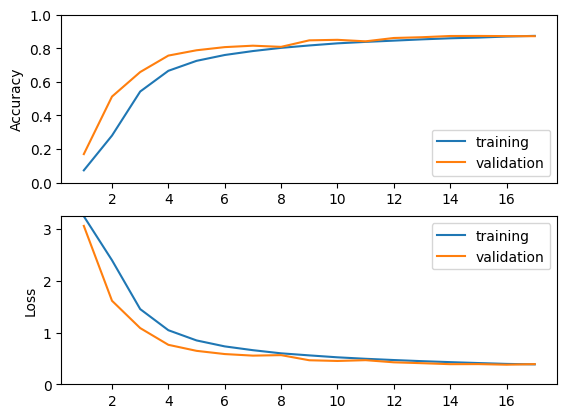

In [48]:
plot_model(model7_history)

In [49]:
model7_eval = model7.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model7_eval[1]}")

650/650 [==============================] - 2s 3ms/step - loss: 0.3841 - accuracy: 0.8734
Accuracy with test data: 0.8734134435653687


### Model 8

*Changes from previous model*: used 'adagrad' optimizer

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 100, Activation: ReLU
  - Neurons: 50, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adagrad
  - Loss function: Categorical Crossentropy


- **Regularization**:
  - Dropout rate: 0.1 for all dropout layers
  - Early Stopping:
    - Monitor: 'val_accuracy'
    - Minimum change: 0.001
    - Patience: 3 epochs
    - Mode: 'max' (for maximizing validation accuracy)

In [51]:
# model 8
model8 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(27,activation='softmax')
])

model8.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 3, 3, 512)         295424    
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 1, 1, 512)       

In [52]:
model8.compile(optimizer="adagrad", loss="categorical_crossentropy", metrics=(["accuracy"]))

model8_history = model8.fit(X_train_images, Y_train_labels,
                    epochs = 20,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose=1,
                    callbacks=[early_stopping])


Epoch 1/20
999/999 [==============================] - 10s 9ms/step - loss: 3.2873 - accuracy: 0.0525 - val_loss: 3.2757 - val_accuracy: 0.0738
Epoch 2/20
999/999 [==============================] - 8s 8ms/step - loss: 3.2655 - accuracy: 0.0669 - val_loss: 3.2380 - val_accuracy: 0.0924
Epoch 3/20
999/999 [==============================] - 8s 8ms/step - loss: 3.2005 - accuracy: 0.0945 - val_loss: 3.0871 - val_accuracy: 0.1506
Epoch 4/20
999/999 [==============================] - 8s 8ms/step - loss: 2.9347 - accuracy: 0.1642 - val_loss: 2.5575 - val_accuracy: 0.2906
Epoch 5/20
999/999 [==============================] - 7s 7ms/step - loss: 2.4684 - accuracy: 0.2751 - val_loss: 2.0016 - val_accuracy: 0.4469
Epoch 6/20
999/999 [==============================] - 8s 8ms/step - loss: 2.0760 - accuracy: 0.3849 - val_loss: 1.6397 - val_accuracy: 0.5354
Epoch 7/20
999/999 [==============================] - 7s 7ms/step - loss: 1.8012 - accuracy: 0.4605 - val_loss: 1.4335 - val_accuracy: 0.5846
Epoch

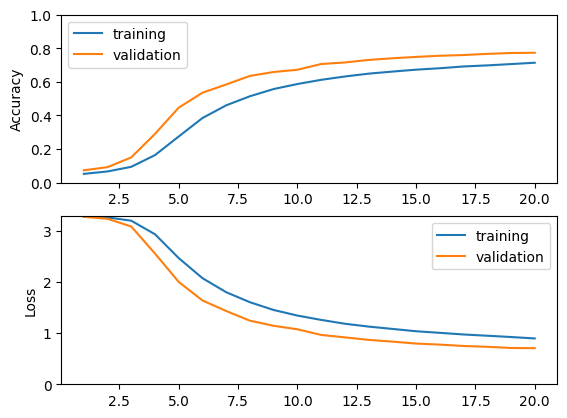

In [53]:
plot_model(model8_history)

In [55]:
model8_eval = model8.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model8_eval[1]}")

650/650 [==============================] - 2s 4ms/step - loss: 0.6995 - accuracy: 0.7753
Accuracy with test data: 0.775288462638855


### Model 9

*Changes from previous model*: used 'Adam' optimizer and changed learning rate to 0.0005

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam with learning rate 0.0005
  - Loss function: Categorical Crossentropy
  - Metrics: Accuracy

- **Regularization (Including Dropout)**:
  - Dropout rate: 0.1 for all dropout layers
  - Early Stopping:
    - Monitor: 'val_accuracy'
    - Minimum change: 0.001
    - Patience: 3 epochs
    - Mode: 'max' (for maximizing validation accuracy)


In [57]:
# model 9 - same as model 4 (which has the higher accuracy so far) but with different learning rate
model9 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(27,activation='softmax')
])

model9.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 2, 2, 512)       

In [58]:
model9.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss="categorical_crossentropy", metrics=(["accuracy"]))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                       min_delta=0.001,
                                       verbose=0,
                                       restore_best_weights = True,
                                       patience=3,
                                       mode='max')

model9_history = model9.fit(X_train_images, Y_train_labels,
                    epochs = 20,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose=1,
                    callbacks=[early_stopping])

early_stop_n = early_stopping.stopped_epoch

if  early_stop_n > 0:
    print(f"training the model is stopped early at epoch {early_stop_n + 1}")
else:
    print("training completed without early stopping.")

Epoch 1/20
999/999 [==============================] - 10s 8ms/step - loss: 0.6389 - accuracy: 0.7993 - val_loss: 0.2781 - val_accuracy: 0.9067
Epoch 2/20
999/999 [==============================] - 8s 8ms/step - loss: 0.2577 - accuracy: 0.9144 - val_loss: 0.2237 - val_accuracy: 0.9261
Epoch 3/20
999/999 [==============================] - 8s 8ms/step - loss: 0.2042 - accuracy: 0.9294 - val_loss: 0.1978 - val_accuracy: 0.9349
Epoch 4/20
999/999 [==============================] - 7s 7ms/step - loss: 0.1763 - accuracy: 0.9383 - val_loss: 0.1991 - val_accuracy: 0.9340
Epoch 5/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1560 - accuracy: 0.9444 - val_loss: 0.1836 - val_accuracy: 0.9405
Epoch 6/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1393 - accuracy: 0.9497 - val_loss: 0.1776 - val_accuracy: 0.9404
Epoch 7/20
999/999 [==============================] - 7s 7ms/step - loss: 0.1261 - accuracy: 0.9535 - val_loss: 0.1835 - val_accuracy: 0.9404
Epoch

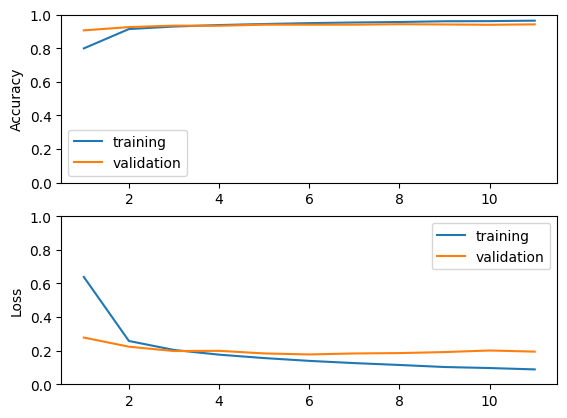

In [59]:
plot_model(model9_history)

In [60]:
model9_eval = model9.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model9_eval[1]}")

650/650 [==============================] - 2s 3ms/step - loss: 0.1912 - accuracy: 0.9397
Accuracy with test data: 0.9397115111351013


### Model 10

*Changes from the previous model*: changed learning rate to 0.001

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam with learning rate 0.001
  - Loss function: Categorical Crossentropy

- **Regularization**:
  - Dropout rate: 0.1 for all dropout
  - Early Stopping:
  - Monitor: 'val_accuracy'
  - Minimum change: 0.001
  - Patience: 3 epochs
  - Mode: 'max' (for maximizing validation accuracy)


In [65]:
# model 10 - learning rate to 0.001
model10 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(27,activation='softmax')
])

model10.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 2, 2, 512)       

In [66]:
model10.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=(["accuracy"]))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                       min_delta=0.001,
                                       verbose=0,
                                       restore_best_weights = True,
                                       patience=3,
                                       mode='max')

model10_history = model10.fit(X_train_images, Y_train_labels,
                    epochs = 20,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose=1,
                    callbacks=[early_stopping])

early_stop_n = early_stopping.stopped_epoch

if  early_stop_n > 0:
    print(f"training the model is stopped early at epoch {early_stop_n + 1}")
else:
    print("training completed without early stopping.")

Epoch 1/20
999/999 [==============================] - 9s 8ms/step - loss: 0.5522 - accuracy: 0.8248 - val_loss: 0.2486 - val_accuracy: 0.9166
Epoch 2/20
999/999 [==============================] - 9s 9ms/step - loss: 0.2316 - accuracy: 0.9228 - val_loss: 0.2107 - val_accuracy: 0.9299
Epoch 3/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1895 - accuracy: 0.9350 - val_loss: 0.2090 - val_accuracy: 0.9305
Epoch 4/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1630 - accuracy: 0.9424 - val_loss: 0.1881 - val_accuracy: 0.9376
Epoch 5/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1438 - accuracy: 0.9481 - val_loss: 0.2015 - val_accuracy: 0.9357
Epoch 6/20
999/999 [==============================] - 7s 7ms/step - loss: 0.1285 - accuracy: 0.9527 - val_loss: 0.1902 - val_accuracy: 0.9372
Epoch 7/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1160 - accuracy: 0.9559 - val_loss: 0.1975 - val_accuracy: 0.9385
traini

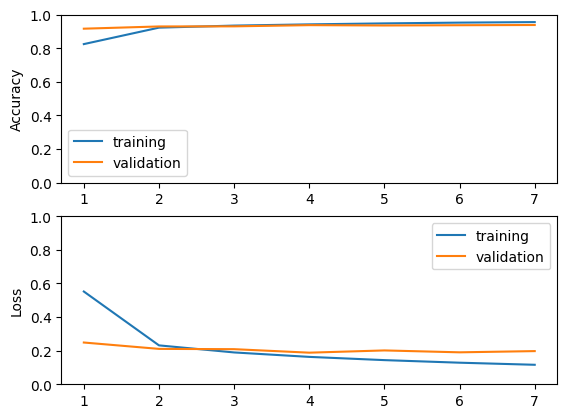

In [67]:
plot_model(model10_history)

In [69]:
model10_eval = model10.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model10_eval[1]}")

650/650 [==============================] - 2s 3ms/step - loss: 0.1815 - accuracy: 0.9378
Accuracy with test data: 0.9377884864807129


### Model 11

*Changes from the previous model*: changed learning rate to 0.002

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam with learning rate 0.002
  - Loss function: Categorical Crossentropy

- **Regularization**:
  - Dropout rate: 0.1 for all dropout layers
  - Early stopping:
  - Monitor: 'val_accuracy'
  - Minimum change: 0.001
  - Patience: 3 epochs
  - Mode: 'max' (for maximizing validation accuracy)


In [70]:
# model 11 - learning rate to 0.002
model11 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(27,activation='softmax')
])

model11.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 2, 2, 512)       

In [71]:
model11.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002), loss="categorical_crossentropy", metrics=(["accuracy"]))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                       min_delta=0.001,
                                       verbose=0,
                                       restore_best_weights = True,
                                       patience=3,
                                       mode='max')

model11_history = model11.fit(X_train_images, Y_train_labels,
                    epochs = 20,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose=1,
                    callbacks=[early_stopping])

early_stop_n = early_stopping.stopped_epoch

if  early_stop_n > 0:
    print(f"training the model is stopped early at epoch {early_stop_n + 1}")
else:
    print("training completed without early stopping.")

Epoch 1/20
999/999 [==============================] - 11s 10ms/step - loss: 0.4808 - accuracy: 0.8465 - val_loss: 0.2414 - val_accuracy: 0.9192
Epoch 2/20
999/999 [==============================] - 8s 8ms/step - loss: 0.2172 - accuracy: 0.9282 - val_loss: 0.1944 - val_accuracy: 0.9347
Epoch 3/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1821 - accuracy: 0.9377 - val_loss: 0.1922 - val_accuracy: 0.9376
Epoch 4/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1594 - accuracy: 0.9440 - val_loss: 0.1963 - val_accuracy: 0.9364
Epoch 5/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1429 - accuracy: 0.9494 - val_loss: 0.2055 - val_accuracy: 0.9356
Epoch 6/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1315 - accuracy: 0.9521 - val_loss: 0.2031 - val_accuracy: 0.9390
Epoch 7/20
999/999 [==============================] - 7s 7ms/step - loss: 0.1191 - accuracy: 0.9561 - val_loss: 0.2090 - val_accuracy: 0.9415
Epoc

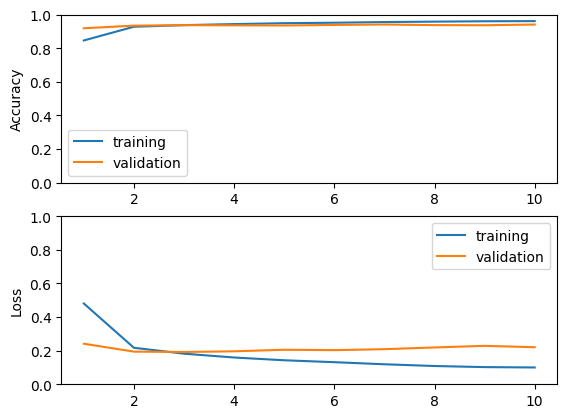

In [72]:
plot_model(model11_history)

In [73]:
model11_eval = model11.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model11_eval[1]}")

650/650 [==============================] - 2s 3ms/step - loss: 0.2159 - accuracy: 0.9394
Accuracy with test data: 0.9394230842590332


### Model 12

*Changes from the previous model*: changed learning rate to 0.003

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam with learning rate 0.003
  - Loss function: Categorical Crossentropy

- **Regularization (Including Dropout)**:
  - Dropout rate: 0.1 for all dropout layers
  - Early Stopping:
    - Monitor: 'val_accuracy'
    - Minimum change: 0.001
    - Patience: 3 epochs
    - Mode: 'max' (for maximizing validation accuracy)


In [74]:
# model 12 - changed learning rate to 0.003
model12 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(27,activation='softmax')
])

model12.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 2, 2, 512)       

In [78]:
# model 12
model12.compile(optimizer=keras.optimizers.Adam(learning_rate=0.003), loss="categorical_crossentropy", metrics=(["accuracy"]))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                       min_delta=0.001,
                                       verbose=0,
                                       restore_best_weights = True,
                                       patience=3,
                                       mode='max')

model12_history = model12.fit(X_train_images, Y_train_labels,
                    epochs = 20,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose=1,
                    callbacks=[early_stopping])

early_stop_n = early_stopping.stopped_epoch

if  early_stop_n > 0:
    print(f"training the model is stopped early at epoch {early_stop_n + 1}")
else:
    print("training completed without early stopping.")

Epoch 1/20
999/999 [==============================] - 14s 11ms/step - loss: 0.1580 - accuracy: 0.9447 - val_loss: 0.2358 - val_accuracy: 0.9349
Epoch 2/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1428 - accuracy: 0.9492 - val_loss: 0.2438 - val_accuracy: 0.9331
Epoch 3/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1377 - accuracy: 0.9507 - val_loss: 0.2214 - val_accuracy: 0.9377
Epoch 4/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1314 - accuracy: 0.9517 - val_loss: 0.2318 - val_accuracy: 0.9327
Epoch 5/20
999/999 [==============================] - 8s 8ms/step - loss: 0.1274 - accuracy: 0.9534 - val_loss: 0.2466 - val_accuracy: 0.9360
Epoch 6/20
999/999 [==============================] - 11s 11ms/step - loss: 0.1224 - accuracy: 0.9545 - val_loss: 0.2495 - val_accuracy: 0.9345
training the model is stopped early at epoch 6


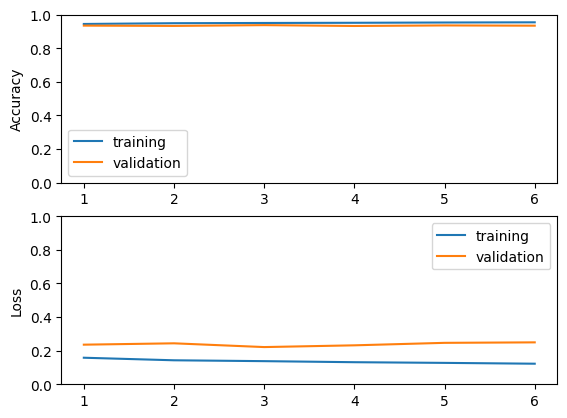

In [80]:
plot_model(model12_history)

In [81]:
model12_eval = model12.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model12_eval[1]}")

650/650 [==============================] - 3s 4ms/step - loss: 0.2275 - accuracy: 0.9354
Accuracy with test data: 0.9353846311569214


### Model 13

*Changes from the previous model*: removed early stopping and increased number of epochs; changed back the learning rate to its default value since none of the above learning rates increased the accuracy level higher than 94.11% (the current best accurracy)

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam
  - Loss function: Categorical Crossentropy

- **Regularization**:
  - Dropout rate: 0.1 for all dropout layers



In [83]:
# model 13 - removed early stopping and used 40 epochs
model13 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(27,activation='softmax')
])

model13.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_56 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 2, 2, 512)       

In [84]:
model13.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=(["accuracy"]))

model13_history = model13.fit(X_train_images, Y_train_labels,
                    epochs = 40,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose=1)

Epoch 1/40
999/999 [==============================] - 10s 8ms/step - loss: 0.5340 - accuracy: 0.8305 - val_loss: 0.2456 - val_accuracy: 0.9164
Epoch 2/40
999/999 [==============================] - 8s 8ms/step - loss: 0.2257 - accuracy: 0.9239 - val_loss: 0.2055 - val_accuracy: 0.9302
Epoch 3/40
999/999 [==============================] - 8s 8ms/step - loss: 0.1837 - accuracy: 0.9364 - val_loss: 0.1965 - val_accuracy: 0.9357
Epoch 4/40
999/999 [==============================] - 7s 7ms/step - loss: 0.1563 - accuracy: 0.9446 - val_loss: 0.2088 - val_accuracy: 0.9321
Epoch 5/40
999/999 [==============================] - 8s 8ms/step - loss: 0.1388 - accuracy: 0.9497 - val_loss: 0.1923 - val_accuracy: 0.9384
Epoch 6/40
999/999 [==============================] - 7s 7ms/step - loss: 0.1254 - accuracy: 0.9534 - val_loss: 0.1850 - val_accuracy: 0.9395
Epoch 7/40
999/999 [==============================] - 8s 8ms/step - loss: 0.1113 - accuracy: 0.9576 - val_loss: 0.1814 - val_accuracy: 0.9442
Epoch

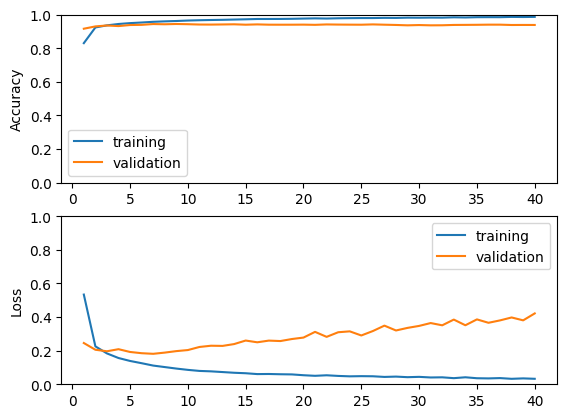

In [85]:
plot_model(model13_history)

In [86]:
model13_eval = model13.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model13_eval[1]}")

650/650 [==============================] - 3s 4ms/step - loss: 0.4445 - accuracy: 0.9371
Accuracy with test data: 0.9371153712272644


### Model 14

*Changes from the previous model*: added more convolutional, maxpooling, and dense layers; used back the early stopping methhod

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 128, Kernel size: (3, 3), Padding: Same, Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 1024, Activation: ReLU
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam
  - Loss function: Categorical Crossentropy

- **Regularization**:
  - Dropout rate: 0.1 for all dropout layers
  - Early Stopping:
    - Monitor: 'val_accuracy'
    - Minimum change: 0.001
    - Patience: 3 epochs
    - Mode: 'max' (for maximizing validation accuracy)


In [87]:
# model 14 - early stopping with more complex model
model14 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(27,activation='softmax')
])

model14.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_58 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_59 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_60 (Conv2D)          (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 2, 2, 128)       

In [88]:
model14.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=(["accuracy"]))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                       min_delta=0.001,
                                       verbose=0,
                                       restore_best_weights = True,
                                       patience=3,
                                       mode='max')

model14_history = model14.fit(X_train_images, Y_train_labels,
                    epochs = 40,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose=1,
                    callbacks=[early_stopping])

early_stop_n = early_stopping.stopped_epoch

if  early_stop_n > 0:
    print(f"training the model is stopped early at epoch {early_stop_n + 1}")
else:
    print("training completed without early stopping.")

Epoch 1/40
999/999 [==============================] - 12s 9ms/step - loss: 0.6278 - accuracy: 0.8020 - val_loss: 0.2699 - val_accuracy: 0.9121
Epoch 2/40
999/999 [==============================] - 8s 8ms/step - loss: 0.2425 - accuracy: 0.9212 - val_loss: 0.2217 - val_accuracy: 0.9263
Epoch 3/40
999/999 [==============================] - 7s 7ms/step - loss: 0.2007 - accuracy: 0.9332 - val_loss: 0.2126 - val_accuracy: 0.9323
Epoch 4/40
999/999 [==============================] - 8s 8ms/step - loss: 0.1753 - accuracy: 0.9412 - val_loss: 0.2234 - val_accuracy: 0.9268
Epoch 5/40
999/999 [==============================] - 8s 8ms/step - loss: 0.1580 - accuracy: 0.9461 - val_loss: 0.2174 - val_accuracy: 0.9344
Epoch 6/40
999/999 [==============================] - 8s 8ms/step - loss: 0.1430 - accuracy: 0.9495 - val_loss: 0.1945 - val_accuracy: 0.9404
Epoch 7/40
999/999 [==============================] - 9s 9ms/step - loss: 0.1307 - accuracy: 0.9536 - val_loss: 0.2027 - val_accuracy: 0.9403
Epoch

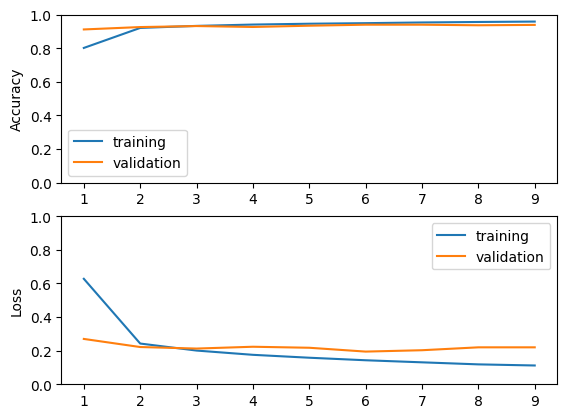

In [89]:
plot_model(model14_history)

In [90]:
model14_eval = model14.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model14_eval[1]}")

650/650 [==============================] - 2s 3ms/step - loss: 0.1979 - accuracy: 0.9395
Accuracy with test data: 0.9395192265510559


### Model 15

*Changes from the previous model*: removed back the additional layers from last model but kept the early stopping and increased dropout to 0.2

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam
  - Loss function: Categorical Crossentropy

- **Regularization**:
  - Dropout rate: 0.2 for all dropout layers
  - Early stopping:
    - Monitor: 'val_accuracy'
    - Minimum change: 0.001
    - Patience: 3 epochs
    - Mode: 'max' (for maximizing validation accuracy)


In [91]:
# model 15 - more dropout
model15 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(27,activation='softmax')
])

model15.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_63 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_64 (Conv2D)          (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 2, 2, 512)       

In [92]:
model15.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=(["accuracy"]))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                       min_delta=0.001,
                                       verbose=0,
                                       restore_best_weights = True,
                                       patience=3,
                                       mode='max')

model15_history = model15.fit(X_train_images, Y_train_labels,
                    epochs = 40,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose=1,
                    callbacks=[early_stopping])

early_stop_n = early_stopping.stopped_epoch

if  early_stop_n > 0:
    print(f"training the model is stopped early at epoch {early_stop_n + 1}")
else:
    print("training completed without early stopping.")

Epoch 1/40
999/999 [==============================] - 11s 9ms/step - loss: 0.5845 - accuracy: 0.8183 - val_loss: 0.2473 - val_accuracy: 0.9145
Epoch 2/40
999/999 [==============================] - 8s 8ms/step - loss: 0.2441 - accuracy: 0.9191 - val_loss: 0.2025 - val_accuracy: 0.9309
Epoch 3/40
999/999 [==============================] - 7s 7ms/step - loss: 0.1979 - accuracy: 0.9333 - val_loss: 0.1926 - val_accuracy: 0.9339
Epoch 4/40
999/999 [==============================] - 8s 8ms/step - loss: 0.1727 - accuracy: 0.9408 - val_loss: 0.1804 - val_accuracy: 0.9388
Epoch 5/40
999/999 [==============================] - 8s 8ms/step - loss: 0.1538 - accuracy: 0.9455 - val_loss: 0.1866 - val_accuracy: 0.9391
Epoch 6/40
999/999 [==============================] - 8s 8ms/step - loss: 0.1391 - accuracy: 0.9506 - val_loss: 0.1752 - val_accuracy: 0.9438
Epoch 7/40
999/999 [==============================] - 8s 8ms/step - loss: 0.1267 - accuracy: 0.9531 - val_loss: 0.1843 - val_accuracy: 0.9413
Epoch

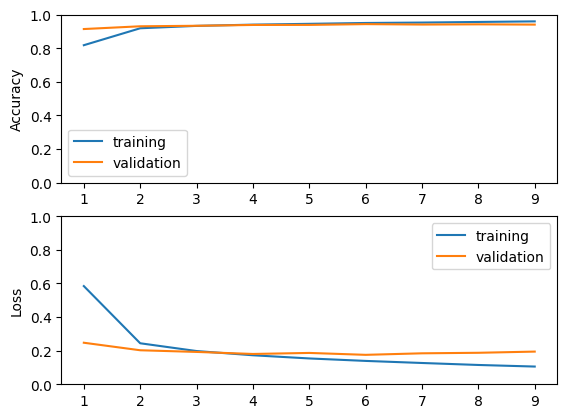

In [93]:
plot_model(model15_history)

In [94]:
model15_eval = model15.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model15_eval[1]}")

650/650 [==============================] - 2s 3ms/step - loss: 0.1801 - accuracy: 0.9412
Accuracy with test data: 0.94120192527771


### Model 16

*Changes from the previous model*: increased dropout to 0.3

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam
  - Loss function: Categorical Crossentropy

- **Regularization**:
  - Dropout rate: 0.3 for all dropout layers
  - Early stopping:
    - Monitor: 'val_accuracy'
    - Minimum change: 0.001
    - Patience: 3 epochs
    - Mode: 'max' (for maximizing validation accuracy)



In [96]:
# model 16 - more dropout
model16 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(27,activation='softmax')
])

model16.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_65 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_66 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_66 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_67 (Conv2D)          (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_67 (MaxPooli  (None, 2, 2, 512)       

In [97]:
model16.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=(["accuracy"]))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                       min_delta=0.001,
                                       verbose=0,
                                       restore_best_weights = True,
                                       patience=3,
                                       mode='max')

model16_history = model16.fit(X_train_images, Y_train_labels,
                    epochs = 40,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose=1,
                    callbacks=[early_stopping])

early_stop_n = early_stopping.stopped_epoch

if  early_stop_n > 0:
    print(f"training the model is stopped early at epoch {early_stop_n + 1}")
else:
    print("training completed without early stopping.")

Epoch 1/40
999/999 [==============================] - 10s 8ms/step - loss: 0.6114 - accuracy: 0.8107 - val_loss: 0.2338 - val_accuracy: 0.9234
Epoch 2/40
999/999 [==============================] - 7s 7ms/step - loss: 0.2584 - accuracy: 0.9166 - val_loss: 0.2136 - val_accuracy: 0.9292
Epoch 3/40
999/999 [==============================] - 8s 8ms/step - loss: 0.2086 - accuracy: 0.9309 - val_loss: 0.2106 - val_accuracy: 0.9324
Epoch 4/40
999/999 [==============================] - 7s 7ms/step - loss: 0.1853 - accuracy: 0.9375 - val_loss: 0.1842 - val_accuracy: 0.9380
Epoch 5/40
999/999 [==============================] - 9s 9ms/step - loss: 0.1636 - accuracy: 0.9441 - val_loss: 0.1852 - val_accuracy: 0.9401
Epoch 6/40
999/999 [==============================] - 8s 8ms/step - loss: 0.1487 - accuracy: 0.9474 - val_loss: 0.1924 - val_accuracy: 0.9382
Epoch 7/40
999/999 [==============================] - 7s 7ms/step - loss: 0.1341 - accuracy: 0.9522 - val_loss: 0.1931 - val_accuracy: 0.9392
Epoch

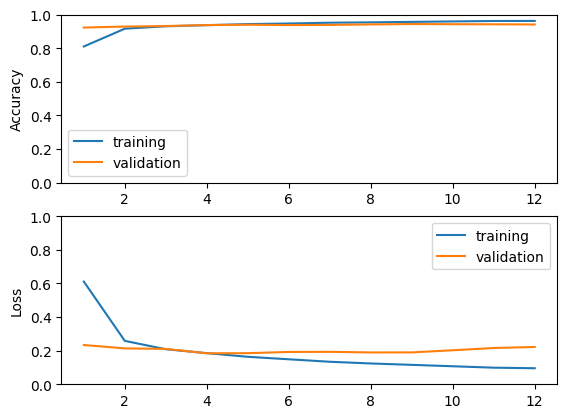

In [98]:
plot_model(model16_history)

In [99]:
model16_eval = model16.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model16_eval[1]}")

650/650 [==============================] - 2s 4ms/step - loss: 0.1912 - accuracy: 0.9434
Accuracy with test data: 0.9434134364128113


### Model 17

*Changes from the previous model*: increased dropout to 0.5

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam
  - Loss function: Categorical Crossentropy

- **Regularization**:
  - Dropout rate: 0.5 for all dropout layers
  - Early stopping:
    - Monitor: 'val_accuracy'
    - Minimum change: 0.001
    - Patience: 3 epochs
    - Mode: 'max' (for maximizing validation accuracy)



In [100]:
# model 17 - more dropout
model17 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(27,activation='softmax')
])

model17.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_68 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_69 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_69 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_70 (Conv2D)          (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_70 (MaxPooli  (None, 2, 2, 512)       

In [101]:
model17.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=(["accuracy"]))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                       min_delta=0.001,
                                       verbose=0,
                                       restore_best_weights = True,
                                       patience=3,
                                       mode='max')

model17_history = model17.fit(X_train_images, Y_train_labels,
                    epochs = 40,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose=1,
                    callbacks=[early_stopping])

early_stop_n = early_stopping.stopped_epoch

if  early_stop_n > 0:
    print(f"training the model is stopped early at epoch {early_stop_n + 1}")
else:
    print("training completed without early stopping.")

Epoch 1/40
999/999 [==============================] - 11s 9ms/step - loss: 0.8083 - accuracy: 0.7556 - val_loss: 0.2545 - val_accuracy: 0.9162
Epoch 2/40
999/999 [==============================] - 7s 7ms/step - loss: 0.3222 - accuracy: 0.9006 - val_loss: 0.2184 - val_accuracy: 0.9291
Epoch 3/40
999/999 [==============================] - 9s 9ms/step - loss: 0.2606 - accuracy: 0.9192 - val_loss: 0.2075 - val_accuracy: 0.9342
Epoch 4/40
999/999 [==============================] - 8s 8ms/step - loss: 0.2277 - accuracy: 0.9271 - val_loss: 0.1934 - val_accuracy: 0.9385
Epoch 5/40
999/999 [==============================] - 7s 7ms/step - loss: 0.2047 - accuracy: 0.9345 - val_loss: 0.1799 - val_accuracy: 0.9407
Epoch 6/40
999/999 [==============================] - 8s 8ms/step - loss: 0.1845 - accuracy: 0.9398 - val_loss: 0.1909 - val_accuracy: 0.9403
Epoch 7/40
999/999 [==============================] - 7s 7ms/step - loss: 0.1711 - accuracy: 0.9433 - val_loss: 0.1922 - val_accuracy: 0.9410
Epoch

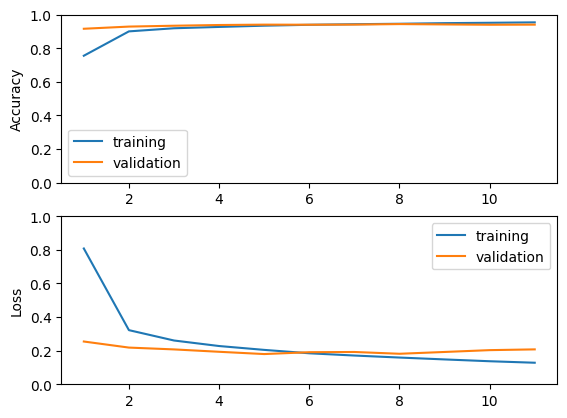

In [102]:
plot_model(model17_history)

In [103]:
model17_eval = model17.evaluate(X_test_images, Y_test_labels)
print(f"Accuracy with test data: {model17_eval[1]}")

650/650 [==============================] - 2s 3ms/step - loss: 0.1895 - accuracy: 0.9427
Accuracy with test data: 0.9426922798156738


### Model 18

*Changes from the previous model*: changed back the dropout to 0.3 and used 'sparse_categorical_crossentropy' loss function

- **Convolutional Layers**:
  - Filters: 32, Kernel size: (3, 3), Activation: ReLU
  - Filters: 64, Kernel size: (3, 3), Activation: ReLU
  - Filters: 512, Kernel size: (3, 3), Padding: Same, Activation: ReLU

- **Pooling Layers**:
  - Pool size: (2, 2) for all MaxPooling2D layers

- **Flattening Layer**:
  - 1 layer used to flatten the output

- **Dense Layers**:
  - Neurons: 512, Activation: ReLU
  - Neurons: 128, Activation: ReLU
  - Neurons: 27, Activation: Softmax

- **Model Compilation**:
  - Optimizer: Adam
  - Loss function: Sparse Categorical Crossentropy


- **Regularization (Including Dropout)**:
  - Dropout rate: 0.3
  - Early stopping:
    - Monitor: 'val_accuracy'
    - Minimum change: 0.001
    - Patience: 3 epochs
    - Mode: 'max' (for maximizing validation accuracy)


In [104]:
# model 18 - dropout back to 0.3 with different loss function
Y_train_labels_integer = np.argmax(Y_train_labels, axis=1)
Y_test_labels_integer = np.argmax(Y_test_labels, axis=1)

model18 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(27,activation='softmax')
])

model8.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 3, 3, 512)         295424    
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 1, 1, 512)       

In [105]:
model18.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=(["accuracy"]))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                       min_delta=0.001,
                                       verbose=0,
                                       restore_best_weights = True,
                                       patience=3,
                                       mode='max')

model18_history = model18.fit(X_train_images, Y_train_labels_integer,
                    epochs = 40,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose=1,
                    callbacks=[early_stopping])

early_stop_n = early_stopping.stopped_epoch

if  early_stop_n > 0:
    print(f"training the model is stopped early at epoch {early_stop_n + 1}")
else:
    print("training completed without early stopping.")

Epoch 1/40
999/999 [==============================] - 9s 7ms/step - loss: 0.6112 - accuracy: 0.8099 - val_loss: 0.2473 - val_accuracy: 0.9202
Epoch 2/40
999/999 [==============================] - 8s 8ms/step - loss: 0.2624 - accuracy: 0.9158 - val_loss: 0.2109 - val_accuracy: 0.9276
Epoch 3/40
999/999 [==============================] - 7s 7ms/step - loss: 0.2121 - accuracy: 0.9299 - val_loss: 0.1946 - val_accuracy: 0.9359
Epoch 4/40
999/999 [==============================] - 10s 10ms/step - loss: 0.1824 - accuracy: 0.9386 - val_loss: 0.1894 - val_accuracy: 0.9395
Epoch 5/40
999/999 [==============================] - 10s 10ms/step - loss: 0.1628 - accuracy: 0.9442 - val_loss: 0.1744 - val_accuracy: 0.9425
Epoch 6/40
999/999 [==============================] - 9s 9ms/step - loss: 0.1455 - accuracy: 0.9484 - val_loss: 0.1842 - val_accuracy: 0.9408
Epoch 7/40
999/999 [==============================] - 11s 11ms/step - loss: 0.1371 - accuracy: 0.9504 - val_loss: 0.1853 - val_accuracy: 0.9421


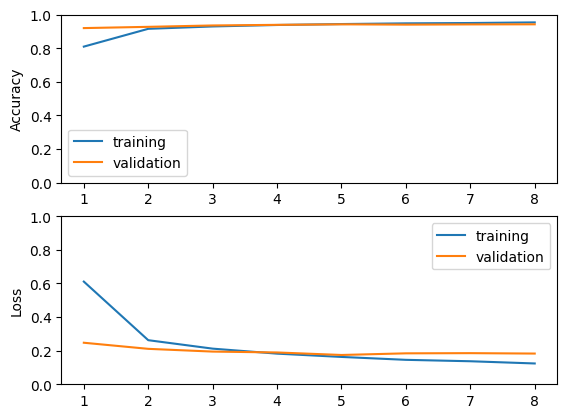

In [106]:
plot_model(model18_history)

In [107]:
model18_eval = model18.evaluate(X_test_images, Y_test_labels_integer)
print(f"Accuracy with test data: {model18_eval[1]}")

650/650 [==============================] - 2s 3ms/step - loss: 0.1796 - accuracy: 0.9407
Accuracy with test data: 0.9407211542129517


### Comparison of all models

In [108]:
# plot rersult of all models
model_dict = {"Model 1": model1_history,
              "Model 2": model2_history,
              "Model 3": model3_history,
              "Model 4": model4_history,
              "Model 5": model5_history,
              "Model 6": model6_history,
              "Model 7": model7_history,
              "Model 8": model8_history,
              "Model 9": model9_history,
              "Model 10": model10_history,
              "Model 11": model11_history,
              "Model 12": model12_history,
              "Model 13": model13_history,
              "Model 14": model14_history,
              "Model 15": model15_history,
              "Model 16": model16_history,
              "Model 17": model17_history,
              "Model 18": model18_history
              }

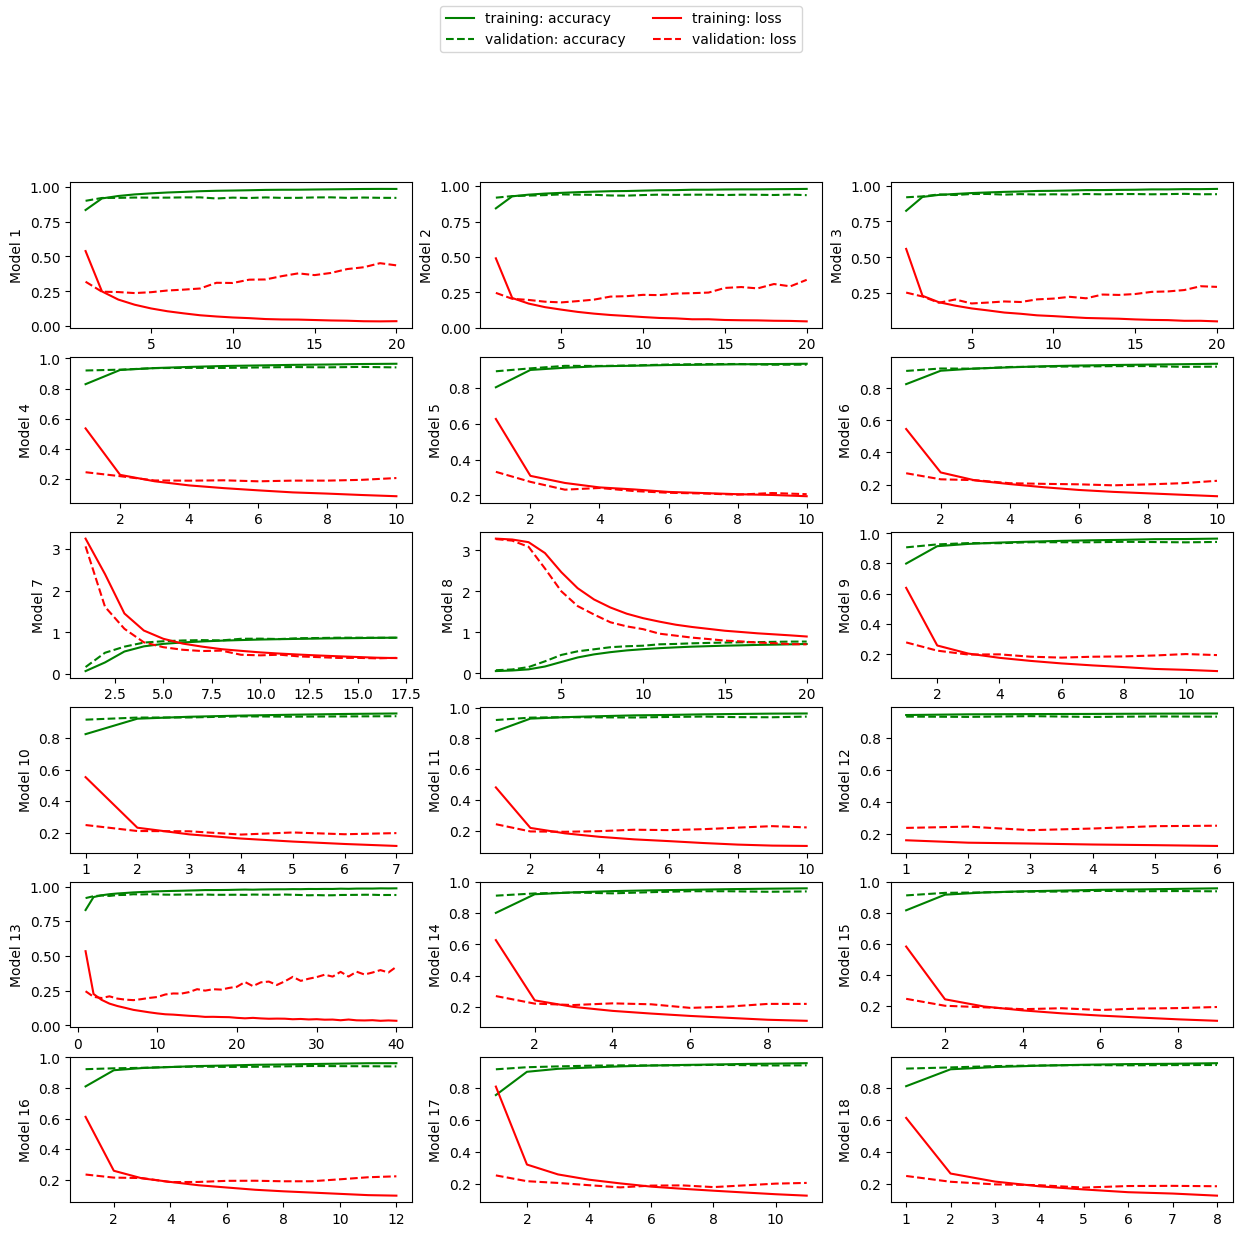

In [109]:
plot_models(model_dict, rows = 6, cols = 3)

In [87]:
# plot model accuracy and loss with test data
# model_eval_dict = {"model 1": model1_eval,
#                    "model 2": model2_eval,
#                    "model 3": model3_eval,
#                    "model 4": model4_eval,
#                    "model 5": model5_eval,
#                    "model 6": model6_eval,
#                    "model 7": model7_eval,
#                    "model 8": model8_eval,
#                    "model 9": model9_eval,
#                    "model 10": model10_eval,
#                    "model 11": model11_eval,
#                    "model 12": model12_eval,
#                    "model 13": model13_eval,
#                    "model 14": model14_eval,
#                    "model 15": model15_eval,
#                    "model 16": model15_eval,
#                    }

# plot_models_eval(model_eval_dict)

In [110]:
models_results = {"Models": ["Model "+str(n) for n in range(1, 19)],
 "Accuracy - train": [model1_history.history['accuracy'][-1],
                      model2_history.history['accuracy'][-1],
                      model3_history.history['accuracy'][-1],
                      model4_history.history['accuracy'][-1],
                      model5_history.history['accuracy'][-1],
                      model6_history.history['accuracy'][-1],
                      model7_history.history['accuracy'][-1],
                      model8_history.history['accuracy'][-1],
                      model9_history.history['accuracy'][-1],
                      model10_history.history['accuracy'][-1],
                      model11_history.history['accuracy'][-1],
                      model12_history.history['accuracy'][-1],
                      model13_history.history['accuracy'][-1],
                      model14_history.history['accuracy'][-1],
                      model15_history.history['accuracy'][-1],
                      model16_history.history['accuracy'][-1],
                      model17_history.history['accuracy'][-1],
                      model18_history.history['accuracy'][-1]
                      ],
 "Loss - train":      [model1_history.history['loss'][-1],
                       model2_history.history['loss'][-1],
                       model3_history.history['loss'][-1],
                       model4_history.history['loss'][-1],
                       model5_history.history['loss'][-1],
                       model6_history.history['loss'][-1],
                       model7_history.history['loss'][-1],
                       model8_history.history['loss'][-1],
                       model9_history.history['loss'][-1],
                       model10_history.history['loss'][-1],
                       model11_history.history['loss'][-1],
                       model12_history.history['loss'][-1],
                       model13_history.history['loss'][-1],
                       model14_history.history['loss'][-1],
                       model15_history.history['loss'][-1],
                       model16_history.history['loss'][-1],
                       model17_history.history['loss'][-1],
                       model18_history.history['loss'][-1]
                      ],
"Accuracy - validation": [model1_history.history['val_accuracy'][-1],
                      model2_history.history['val_accuracy'][-1],
                      model3_history.history['val_accuracy'][-1],
                      model4_history.history['val_accuracy'][-1],
                      model5_history.history['val_accuracy'][-1],
                      model6_history.history['val_accuracy'][-1],
                      model7_history.history['val_accuracy'][-1],
                      model8_history.history['val_accuracy'][-1],
                      model9_history.history['val_accuracy'][-1],
                      model10_history.history['val_accuracy'][-1],
                      model11_history.history['val_accuracy'][-1],
                      model12_history.history['val_accuracy'][-1],
                      model13_history.history['val_accuracy'][-1],
                      model14_history.history['val_accuracy'][-1],
                      model15_history.history['val_accuracy'][-1],
                      model16_history.history['val_accuracy'][-1],
                      model17_history.history['val_accuracy'][-1],
                      model18_history.history['val_accuracy'][-1]
                      ],
 "Loss - validation": [model1_history.history['val_loss'][-1],
                       model2_history.history['val_loss'][-1],
                       model3_history.history['val_loss'][-1],
                       model4_history.history['val_loss'][-1],
                       model5_history.history['val_loss'][-1],
                       model6_history.history['val_loss'][-1],
                       model7_history.history['val_loss'][-1],
                       model8_history.history['val_loss'][-1],
                       model9_history.history['val_loss'][-1],
                       model10_history.history['val_loss'][-1],
                       model11_history.history['val_loss'][-1],
                       model12_history.history['val_loss'][-1],
                       model13_history.history['val_loss'][-1],
                       model14_history.history['val_loss'][-1],
                       model15_history.history['val_loss'][-1],
                       model16_history.history['val_loss'][-1],
                       model17_history.history['val_loss'][-1],
                       model18_history.history['val_loss'][-1]
                      ],
 "Accuracy - test": [model1_eval[1],
                     model2_eval[1],
                     model3_eval[1],
                     model4_eval[1],
                     model5_eval[1],
                     model6_eval[1],
                     model7_eval[1],
                     model8_eval[1],
                     model9_eval[1],
                     model10_eval[1],
                     model11_eval[1],
                     model12_eval[1],
                     model13_eval[1],
                     model14_eval[1],
                     model15_eval[1],
                     model16_eval[1],
                     model17_eval[1],
                     model18_eval[1]
                     ],
 "Loss - test": [model1_eval[0],
                 model2_eval[0],
                 model3_eval[0],
                 model4_eval[0],
                 model5_eval[0],
                 model6_eval[0],
                 model7_eval[0],
                 model8_eval[0],
                 model9_eval[0],
                 model10_eval[0],
                 model11_eval[0],
                 model12_eval[0],
                 model13_eval[0],
                 model14_eval[0],
                 model15_eval[0],
                 model16_eval[0],
                 model17_eval[0],
                 model18_eval[0]
                 ]
 }

In [111]:
table = PrettyTable()

for k, v in models_results.items():
    rounded_values = [round(val, 4) if isinstance(val, (int, float)) else val for val in v]
    table.add_column(k, rounded_values)

table.title = "Accuracy and Loss with Train, Validation, and Test Data"

print(table)

+------------------------------------------------------------------------------------------------------------------------+
|                                Accuracy and Loss with Train, Validation, and Test Data                                 |
+----------+------------------+--------------+-----------------------+-------------------+-----------------+-------------+
|  Models  | Accuracy - train | Loss - train | Accuracy - validation | Loss - validation | Accuracy - test | Loss - test |
+----------+------------------+--------------+-----------------------+-------------------+-----------------+-------------+
| Model 1  |      0.9856      |    0.035     |         0.9214        |       0.4362      |      0.9208     |    0.4524   |
| Model 2  |      0.9804      |    0.0458    |         0.9362        |       0.339       |      0.9339     |    0.3492   |
| Model 3  |      0.9774      |    0.0529    |         0.9405        |       0.2935      |      0.9399     |    0.2965   |
| Model 4  |    

Among the above 18 models, **model #8** has the worst accuracy level (77.53%) and **model #16** has the highest accuracy level (94.34%).